In [2]:
!pip install transformers torch scikit-learn pandas tqdm

from transformers import BertTokenizer, BertForSequenceClassification
import torch

c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
W0203 19:27:30.102000 28008 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Window

Training samples: 7


c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\tr

Epoch 1 Loss: 2.9151


Epoch 2: 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]


Epoch 2 Loss: 2.5071


Epoch 3: 100%|██████████| 2/2 [00:05<00:00,  2.63s/it]


Epoch 3 Loss: 2.4946


Epoch 4: 100%|██████████| 2/2 [00:04<00:00,  2.31s/it]


Epoch 4 Loss: 2.3834


Epoch 5: 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]


Epoch 5 Loss: 2.0540


Epoch 6: 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]


Epoch 6 Loss: 1.8421
Accuracy: 0.2


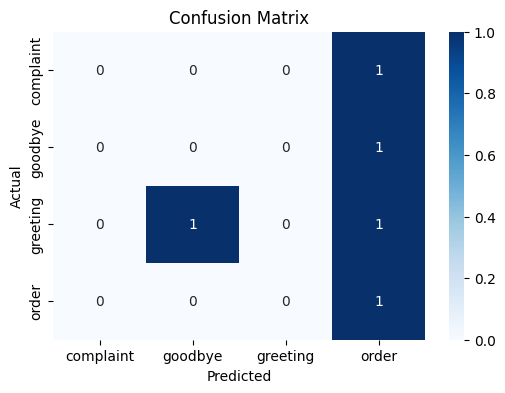

c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   complaint       0.00      0.00      0.00         1
     goodbye       0.00      0.00      0.00         1
    greeting       0.00      0.00      0.00         2
       order       0.25      1.00      0.40         1

    accuracy                           0.20         5
   macro avg       0.06      0.25      0.10         5
weighted avg       0.05      0.20      0.08         5

order
goodbye
order


In [9]:
# ===============================
# TRANSFORMER (BERT) INTENT CLASSIFIER
# ALL-IN-ONE CODE
# ===============================

# 1. INSTALL DEPENDENCIES (RUN ONCE)
!pip install transformers torch scikit-learn pandas tqdm seaborn matplotlib

# 2. IMPORTS
import torch
import pandas as pd
import numpy as np

from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# 3. DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 4. DATASET
data = {
    "text": [
        "hello",
        "hi there",
        "good morning",
        "bye",
        "goodbye",
        "see you later",
        "I want to order food",
        "place an order",
        "order pizza",
        "my order is late",
        "I want a refund",
        "this service is bad"
    ],
    "intent": [
        "greeting",
        "greeting",
        "greeting",
        "goodbye",
        "goodbye",
        "goodbye",
        "order",
        "order",
        "order",
        "complaint",
        "complaint",
        "complaint"
    ]
}

df = pd.DataFrame(data)

# 5. LABEL ENCODING
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["intent"])
num_labels = len(label_encoder.classes_)

# 6. TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["label"],
    test_size=0.4,
    random_state=42,
    stratify=df["label"]
)
print("Training samples:", len(X_train))
# 7. TOKENIZER
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 8. DATASET CLASS
class IntentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=32):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

# 9. DATALOADERS
train_dataset = IntentDataset(X_train, y_train, tokenizer)
test_dataset  = IntentDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=4)

# 10. MODEL
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_labels
)
model.to(device)

# 11. OPTIMIZER
optimizer = AdamW(model.parameters(), lr=2e-5)

# 12. TRAINING
epochs = 6

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} Loss: {total_loss:.4f}")

# 13. EVALUATION
model.eval()
preds, true = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        predictions = torch.argmax(outputs.logits, dim=1)
        preds.extend(predictions.cpu().numpy())
        true.extend(labels.cpu().numpy())

accuracy = accuracy_score(true, preds)
print("Accuracy:", accuracy)

# 14. CONFUSION MATRIX
cm = confusion_matrix(true, preds)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 15. CLASSIFICATION REPORT
print(classification_report(true, preds, target_names=label_encoder.classes_))

# 16. PREDICTION FUNCTION
def predict_intent(text):
    model.eval()

    encoding = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=32
    )

    with torch.no_grad():
        outputs = model(
            input_ids=encoding["input_ids"].to(device),
            attention_mask=encoding["attention_mask"].to(device)
        )

    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    return label_encoder.inverse_transform([predicted_label])[0]

# 17. TEST
print(predict_intent("I want to order biryani"))
print(predict_intent("hello bro"))
print(predict_intent("this service is terrible"))


In [1]:
data = {
    "text": [
        "hello", "hi", "hey", "good morning", "good evening",
        "bye", "goodbye", "see you later", "take care",
        "I want to order food", "order pizza", "place my order",
        "my order is late", "this service is bad", "I want a refund"
    ] * 10,   # duplicate for demo
    "intent": [
        "greeting","greeting","greeting","greeting","greeting",
        "goodbye","goodbye","goodbye","goodbye",
        "order","order","order",
        "complaint","complaint","complaint"
    ] * 10
}
